# Python Machine Learning - Simple Linear Regression LectureCode

<p><a name="sections"></a></p>


## Sections

- <a href="#linear">Linear Regression</a><br>
 - <a href="#coeff">The Coefficients</a><br>
 - <a href="#error">The Errors</a><br>
   - <a href="#assumption">The Basic Assumptions on Linear Regression</a><br>
 - <a href="#estimate">Estimating the Coefficients</a><br>
    - <a href="#residual">Residuals</a><br>
    - <a href="#formula">The Formula for the Coefficients</a><br>
 - <a href="#rsquare">Evaluating the Model: Coefficient of Determination</a><br>
 - <a href="#reg_sklearn">Linear Regression in Scikit-Learn</a><br>
    - <a href="#ex1">Exercise: Simple Linear Regression Lab</a><br>
 - <a href="#reg_sklearn">Getting the confidence intervals from the statsmodels</a><br>       

In [1]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

<p><a name="linear"></a></p>
## Linear Regression

Linear regression is a supervised machine learning method that aims to uncover the relationship between continuous variables:

- One or more explanatory/independent/input variables $X_1, X_2,..., X_p$.
- The response/dependent/output variable Y.


**Simple linear regression** is a special case when there is only one explanatory variable $X$. In this case, the relation can be represented quantitatively by:
$$
Y = \beta_0 + \beta_1X + \epsilon
$$

- $\beta_0$ and $\beta_1$ are two unknown constants that represent the intercept and slope.
- $\epsilon$ is called the error term.  This represents the deviation of the value from the linearity.



For example, Okun's law in macroeconomics can be modeled by simple linear regression. Here the GDP growth is presumed to be in a linear relationship with the changes in the unemployment rate.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/77/Okuns_law_quarterly_differences.svg">
*Source: https://en.wikipedia.org/wiki/Simple_linear_regression*

- Okun's law can be modeled as

$$ \Delta GDP = \beta_0 + \beta_1 (\Delta\text{unemployment rate}) + \epsilon$$

<p><a name="coeff"></a></p>
### The Coefficients

Below we visualize our simple linear model with an example $Y = 1 + 0.5 X + \epsilon$.  ($\beta_0 = 1$ and $\beta_1=0.5)$

- $\beta_0$ and $\beta_1$ defines the linear relation. This means that if we observe a set of n independent variables $X = (x_1, x_2, ..., x_n)$:

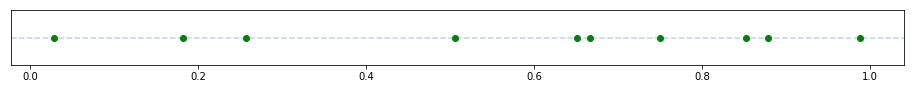

In [2]:
np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))

plt.figure(figsize=(16, 1))
plt.scatter(X, np.zeros(N), color='green')
plt.yticks([])
plt.ylim(-0.2, 0.2)
plt.axhline(y=0, alpha=0.3, ls='dashed')
plt.show()

The linear relation $Y = 1 + 0.5X$ indicates that the outcome $Y = (y_1, y_2, ..., y_n)$ should be:

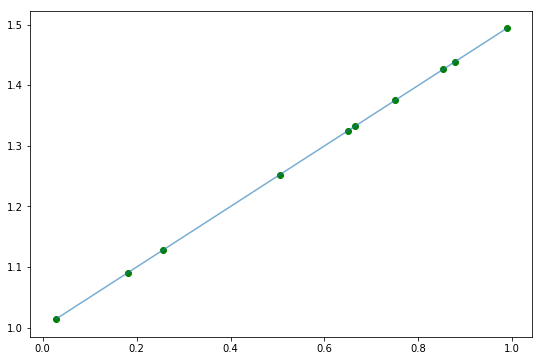

In [3]:
beta_0 = 1
beta_1 = 0.5
Y = beta_1*X + beta_0 

figure = plt.figure(figsize=(9, 6))
plt.plot(X, beta_1 * X + beta_0, figure=figure, alpha=0.6)
plt.scatter(X, Y, figure=figure, color='green')
plt.show()

Note that there is **NO** randomness involved. We say that $\beta_0 \text{ and } \beta_1$ are **constant**. Note that $\beta_0 \text{ and } \beta_1$ are in fact the **intercept** and the **slope** respectively.

<p><a name="error"></a></p>
### The Errors

All the randomness are attributed to $ \epsilon $. The relation $Y = 1 + 0.5X + \epsilon \text{ becomes: }$

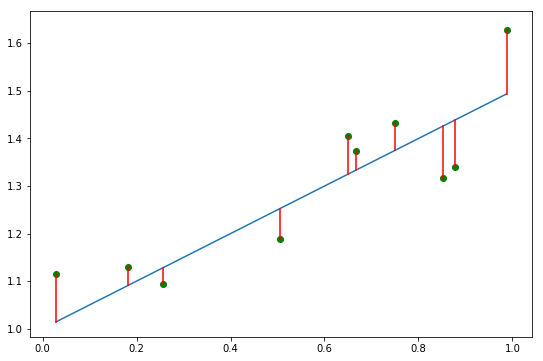

In [4]:
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1*X + error
figure = plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.plot(X, beta_0 + beta_1*X)
for i in range(N):
    plt.plot([X[i], X[i]], [beta_0+beta_1*X[i], Y[i]], color='red')
plt.show()

<p><a name="assumption"></a></p>
#### The Basic Assumptions on Linear Regression

The basic assumptions of a simple linear model are:

- Linearity
- Normality
- Constant Variance
- Independent Errors

<p><a name="linearity"></a></p>
#### Linearity

Linearity defines the relation between $X \text{ and } Y$. As we saw in the previous plot, it is represented by $\beta_0 \text{ and } \beta_1$.

We will discuss how these two constants are estimated.

<p><a name="on_error"></a></p>
#### Assumptions on the Errors

We cannot estimate $\epsilon$ mainly because it is random. However, we can still study some properties of the randomness. The last three assumptions (all but linearity) on linear model describe what kind of randomness $\epsilon$ should be.

**Normality**

Randomness are often described by **distribution**, which can be seen only when we have a lot of samples. So let's create a much larger sample set:

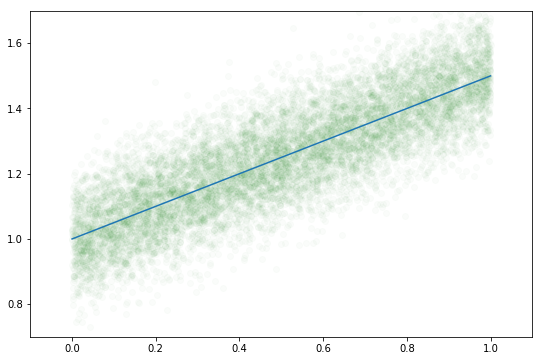

In [5]:
N = int(1e4)
np.random.seed(168)
X = np.random.rand(N)
X = np.array(sorted(X))
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1 * X + error

plt.figure(figsize=(9, 6))
plt.scatter(X, Y, alpha=0.02, color='green')
plt.plot(X, beta_0 + beta_1 * X)
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.show()

- And again we visualize the error with some of the $X$:

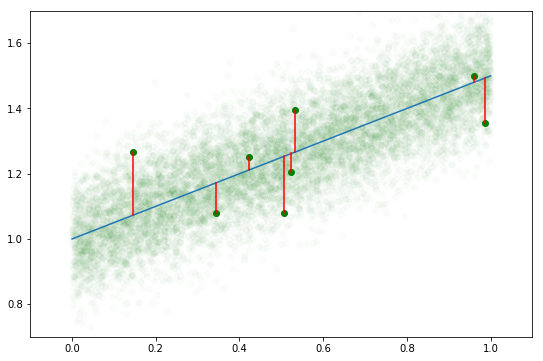

In [6]:
np.random.seed(1127)

plt.figure(figsize=(9, 6))
plt.scatter(X, Y, alpha=0.02, color='green')
plt.plot(X, beta_0 + beta_1 * X)
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)

example = np.random.choice(np.arange(N), size=8, replace=False)
for i in example:
    plt.scatter(X[i], Y[i], alpha=1, color='green')
    plt.plot([X[i], X[i]], [beta_0 + beta_1 * X[i], Y[i]], color='red')
plt.show()

- The normality assumption means if we sketch the histogram of the errors, it looks like:

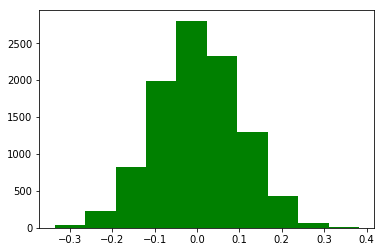

In [7]:
plt.hist(error, color='green', bins=10)
plt.show()

Note that the **mean** and the **standard deviation** of our errors are:

In [8]:
print('The mean of the errors is %.4f' %np.mean(error))
print('The standard deviation of the errors is %.4f' % np.std(error))

The mean of the errors is 0.0018
The standard deviation of the errors is 0.0995


We can compare the normalized histogram and the pdf curve of a normal distribution. 

- Note the difference between the `y` axes of the plot below and of the previous one.

//anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


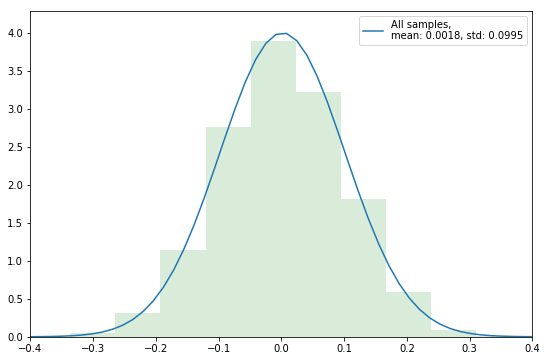

In [9]:
plt.figure(figsize=(9, 6))
plt.xlim(-0.4, 0.4)
plt.ylim(0, 4.3)
plt.hist(error, color='green', bins=10, normed=True, alpha=0.15)
my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)
plt.legend()
plt.show()

**Constant Variance and Independent Errors**

The following two conditions:
- constant variance
- independent errors

indicate that the error of each observation is drawn independently from the same probability distribution. **Why?**



**How do we check that?**

- For a **single** observation, the relationship between the error and its distribution is weak. However, if all the errors obey the same distribution, we should obtain the same (or very similar) bell shape curve when we randomly choose a (large enough) subset from the observations.

For example, let's pick the observations from $X$ which are less than 0.5 and compare the normal distribution obtained from them with the one obtained from the full sample. You are invited to change the range of observations selected below and make the same comparison.

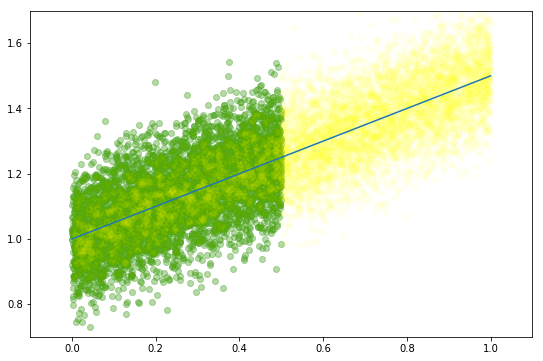

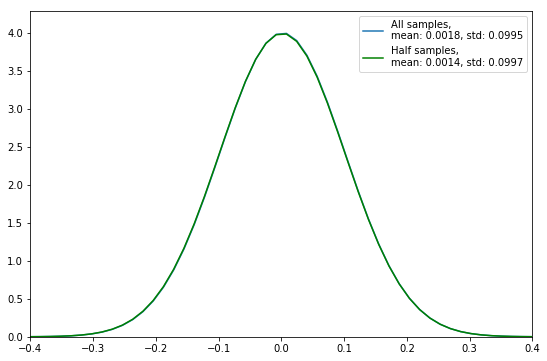

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

index = np.where(np.logical_and(X > 0, X < 0.5))
sub_X = X[index]
sub_Y = Y[index]

plt.figure(figsize=(9, 6))
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.scatter(sub_X, sub_Y, alpha=0.3, color='green')
plt.scatter(X, Y, alpha=0.05, color='yellow')
plt.plot(X, beta_0 + beta_1 * X)

sub_error = sub_Y - (beta_0 + beta_1 * sub_X)

plt.figure(figsize=(9, 6))
plt.xlim(-0.4, 0.4)
plt.ylim(0, 4.3)

my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)

my_norm = stats.norm(np.mean(sub_error), np.std(sub_error)).pdf
label = 'Half samples,\nmean: %.4f, std: %.4f' % (np.mean(sub_error), np.std(sub_error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), color='green', label=label)

plt.legend()
plt.show()

- We may also just randomly select the subset and make the same comparison. Again you are invited to change the amount of observations selected below.

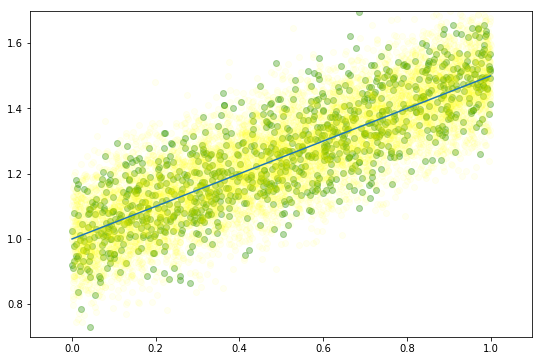

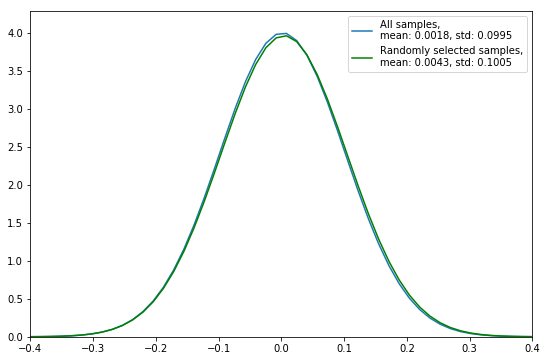

In [11]:
#### You may run the code below multiple times; each time we run it we are selecting different 
#### subset. You might also change the size of subset.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

size = 1000
index = np.random.choice(N, size, replace=False)
sub_X = X[index]
sub_Y = Y[index]
sub_error = sub_Y - (1 + 0.5 * sub_X)

sub_X = X[index]
sub_Y = Y[index]

plt.figure(figsize=(9, 6))
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.scatter(sub_X, sub_Y, alpha=0.3, color='green')
plt.scatter(X, Y, alpha=0.05, color='yellow')
plt.plot(X, beta_0 + beta_1 * X)

plt.figure(figsize=(9, 6))
plt.xlim(-0.4, 0.4)
plt.ylim(0, 4.3)

my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)

my_norm = stats.norm(np.mean(sub_error), np.std(sub_error)).pdf
label = 'Randomly selected samples,\nmean: %.4f, std: %.4f' % (np.mean(sub_error), np.std(sub_error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), color='green', label=label)

plt.legend()
plt.show()

<p><a name="estimate"></a></p>
### Estimating the Coefficients

In general, the optimal $\beta_0$ and $\beta_1$ are unknown a priori. What we are given is a set of observations $X \text{ and } Y$. Essentially what we do is to **try** all the possible pairs of $\beta_0 \text{ and } \beta_1$, and find the pair defining the linear model most "similar" to the observations.

- We again illustrate the process with visualization. For simplicity, we stick to 10 observations:

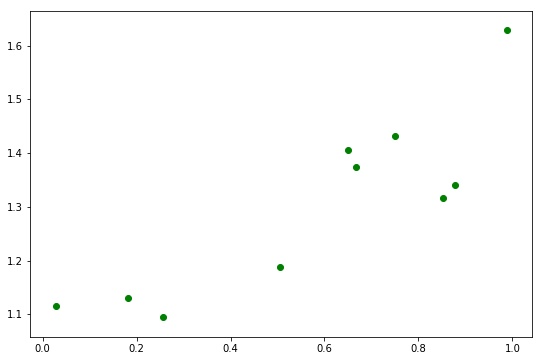

In [12]:
np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))

error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1 * X + error
plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.show()

<p><a name="residual"></a></p>
#### Residuals

- We then start trying out some pair of $( \tilde{\beta}_0, \tilde{\beta}_1) \text{ , say, } (0.5, 1)$.

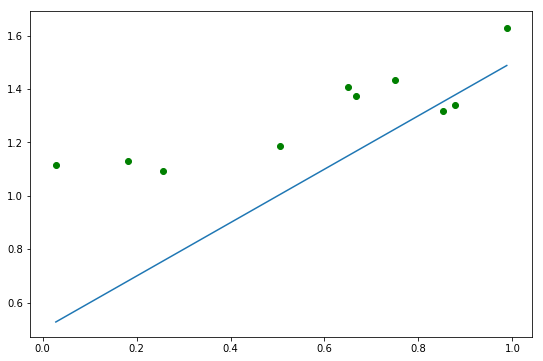

In [13]:
plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)
plt.show()

How different is the model from the observations?

- We may again consider the difference between the observation and the model:
$$
e = Y - (\tilde{\beta_0} + \tilde{\beta_1} X) 
$$

This difference vector is called the **residual**.

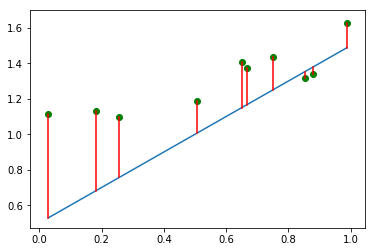

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)
for i in range(N):
    plt.plot([X[i], X[i]], [0.5+X[i], Y[i]], color='red')
plt.show()

To quantify the difference between the model and the observations, we use the **residual sum of squares**, or **RSS**. It is defined by:
$$
\text{ } \\
\text{Denote } e = (e_1, e_2, e_3, ..., e_n) \\
\text{ } \\
\begin{align*} 
RSS(\tilde{\beta_0}, \tilde{\beta_1})=& e_1^2 + e_2^2 + ... + e_n^2
\\ 
=&\sum_{i=1}^{n}(y_i-\tilde{\beta}_0-\tilde{\beta}_1x_i)^2
\end{align*}
$$

- Therefore RSS depends on ( $\tilde{\beta_0}$, $\tilde{\beta_1}$).
- Below we see that indeed the model with least RSS is most similar to the observations.

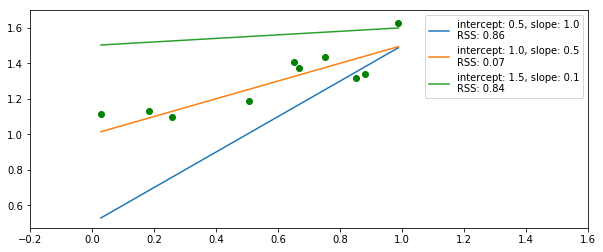

In [15]:
fig = plt.figure(figsize=(10, 4))
plt.scatter(X, Y, color='green')

plt.xlim(-0.2, 1.6)

for b0, b1 in [(0.5, 1), (1, 0.5), (1.5, 0.1)]:
    res = Y - (b0 + b1 * X)
    text = 'intercept: %.1f, slope: %.1f\nRSS: %.2f' %(b0, b1, np.sum(res**2))
    plt.plot(X, b0 + b1 * X, label=text)

plt.legend()
plt.show()

**Question** $( \tilde{\beta_0}, \tilde{\beta_1})=(1, 0.5)$ is the best among three. Is it actually the best possible pair?

The coefficients that really minimize RSS are denoted by $(\hat{\beta_0}, \hat{\beta_1})$. And the linear model is denoted by:

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X$$

- The symbol $\hat{}$ denotes an estimated value. The coefficients $(\hat{\beta_0}, \hat{\beta_1})$ are called the **ordinary least square estimator**, (**OLS**). Once we have the estimators and a newly observed $X$, the corresponding $Y$ can be predicted by passing $X$ into the formula above.

<p><a name="formula"></a></p>
#### The Formula of the Coefficients -- The Normal Equation

- Minimizing the RSS characterizes the coefficients $(\hat{\beta_0}, \hat{\beta_1})$ uniquely. We will not discuss how to derive them, it is actually the standard optimization problem by differentiation. $(\hat{\beta_0}, \hat{\beta_1})$ actually admits a closed form:

$$
\begin{align}
\text{ }\\
\hat{\beta}_1&=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}
\\
\hat{\beta}_0&=\bar{y}-\hat{\beta}_1\bar{x}\\
\text{ }\\
\text{wh}&\text{ere } \bar{y} \text{ and } \bar{x} \text{ are the sample means of } x_i \text{ and } y_i, \text{ respectively.} 
\end{align}
$$

- Of course, if you don't care about math, scikit-learn will find the coefficients for us.

<p><a name="rsquare"></a></p>
### Evaluating the Model: Coefficient of Determination

- Once we fit a linear model, how should we assess the overall accuracy of the model?

- The usual way to measure the overall accuracy of a simple linear model is to use the **coefficient of determination**.

- The coefficient of determination, denoted $R^2$, measures how well a model fits the data.

- $R^2$ is defined as
$$R^2=1-\frac{RSS}{TSS}$$
  where TSS is the total sum of squares:
$$TSS=\sum_{i=1}^{n}(y_i-\bar{y})^2$$

- RSS (The total area of the blue squares) represents the squared residuals with respect to the linear regression. 

- TSS (The total area of the red squares) represents the squared residuals with respect to the average value and is fixed if data is known. (Can you tell why?)

- Therefore the coefficient of determination is a number $\in [0,1]$ that gauges the proportion of the variance in the dependent variable that is predictable from the independent variable.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg" style="width: 500px;">
*Source: https://en.wikipedia.org/wiki/Coefficient_of_determination. The areas of the red squares represent TSS. The areas of the blue squares represent RSS.
*

- Given a dataset, TSS is model independent, the fitted model has the minimum RSS among all linear models:

  - $R^2 = 1$ indicates that the regression line fits the data perfectly (no error).
  
  - $R^2 = 0$ indicates that the line fits the data not better than the null model (horizontal $y=\bar{y})$.
  
  - In general, the better the linear regression fits the data in comparison to the sample average, the closer the value of $R^2$ is to 1.

<p><a name="reg_sklearn"></a></p>
### Linear Regression in Scikit-Learn

In [16]:
#### In case you change the variables, let create them again:
#### Loading the packages to be used
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats

beta_0 = 1
beta_1 = 0.5

np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1 * X + error

- To fit a linear model with scikit-learn, first we need to import **`linear_model`** from **`sklearn`**. 

- Then we create a **`LinearRegression`** instance, which uses the **`OLS`** method to fit a linear model.

In [17]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

# Also valid Python syntax:
# from sklearn.linear_model import LinearRegression
# ols = LinearRegression()

Some attributes and methods we will use for linear regression:

- `coef_`: Estimated coefficients ($\hat{\beta}_1$,...) for the linear regression problem.
- `intercept_`: Independent term ($\hat{\beta}_0$) in the linear model.
- `fit(X, y)`: Fit linear model.
- `predict(X)`: Predict using the linear model
- `score(X, y)`: Returns the coefficient of determination $R^2$ of the prediction.


In [18]:
# Attributes and methods may differ in different versions of scikit-learn.
# You can find the current version's by adding a question mark after any variable, class or function
# This is known as an iPython "magic" command
ols?

**Fitting**

Next we fit a simple linear model with the data set.

- Once we fit the model, the coefficients can be accessed via `coef_` and `intercept_` attributes.

In [19]:
ols.fit(X.reshape(-1,1), Y)   #### What happen if we remove the 'reshape' method? 
print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.3f" %ols.intercept_)

beta_1: 0.457
beta_0: 1.040


**Predicting**

- To make prediction with the fitted model, we simply pass a **column vector** to `predict()`.

[1.05251398 1.12263584 1.15694823 1.27043576 1.33662371 1.3438067
 1.38218682 1.42881625 1.44085917 1.49077568]


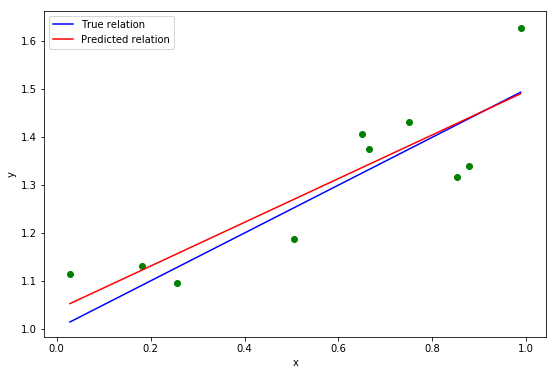

In [20]:
#### For convenience, let's update X
X = X.reshape(-1,1)
print(ols.predict(X))

plt.figure(figsize=(9, 6))
plt.plot(X, beta_0 + beta_1*X, c='b', lw=1.5, label='True relation')
plt.plot(X, ols.predict(X), c='r', lw=1.5, label='Predicted relation')
plt.scatter(X, Y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

In [21]:
#### predict: prediction
print("RSS: %.2f" % np.sum((Y - ols.predict(X)) ** 2))
#ols.residues_  # will be deprecated in version 0.19
## score: the R^2 of the fitted model
print('R^2: %.2f' % ols.score(X, Y))

RSS: 0.06
R^2: 0.75


- The RSS is 0.06, which is better than passing any other pair into the function $RSS$.

- The $R^2$ is 75%, which means that 75% of the variance of Y can be explained by variable X.

<p><a name="ex1"></a></p>
#### Exercise  - Simple Linear Regression Lab

Now let’s apply the method to solve a real world problem.

- In this exercise, you will implement linear regression with one independent variable to predict profits for a food truck.

- The file ex1data1.csv contains the dataset for our linear regression problem. 
  - The first column is the population of a city,
  - and the second column is the profit of a food truck in that city.
  - A negative value of profit indicates a loss.


- Find the correct path to the file to load the data and use scatter plot to visualize it.

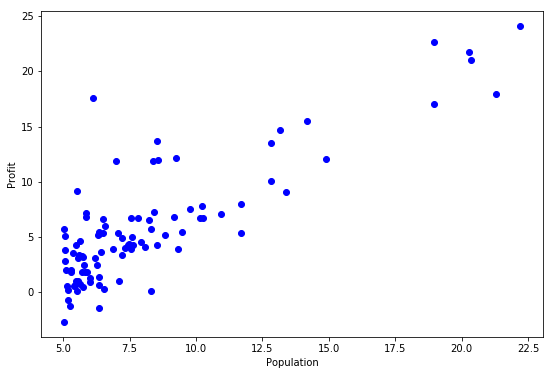

In [22]:
import pandas as pd
# give the path to the file 
path_to_file = "./data/ex1data1.csv"
data = pd.read_csv(path_to_file, header=None, names=["Population", "Profit"])

x = data[["Population"]]
y = data["Profit"]
## do a scatter plot with data x and y
plt.figure(figsize=(9, 6))
plt.scatter(x, y, c='b')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

- Create a LinearRegression instance and use `fit()` function to fit the data.

In [23]:
#### Your code here

from sklearn import linear_model
ols = linear_model.LinearRegression()
## fit your linear model with fit() function
ols.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- Add a fitted regression line using `plot()` method and see if it fits the data points.

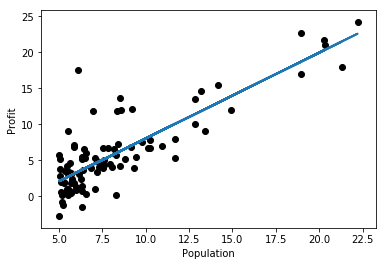

In [24]:
#### Your code here

## plot the fitted line
plt.plot(x, ols.predict(x), lw=2)
## plot the data points
plt.scatter(x, y, c='k')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

- Calculate the following values with your fitted model:

- What are the coefficients $\beta_0$ and $\beta_1$?
- What is the residual sum of squares (RSS)?
- What is the coefficient of determination ($R^2$)?

In [25]:
#### Your code here

# find beta_0 with .intercept_ attribute
b_0 = ols.intercept_
# find beta_1 with .coef_ attribute
b_1 = ols.coef_
# calculate RSS using sum(y - predicted y)^2
rss = np.sum((y-ols.predict(x)) ** 2)
# calculate the score of fit
r_2 = ols.score(x, y)
print("beta_0: %.3f" %b_0)
print("beta_1: %.3f" %b_1)
print('RSS: %.2f' %rss)
print('R^2: %.2f' %r_2)
#ols.residues_  # will be deprecated in version 0.19

beta_0: -3.896
beta_1: 1.193
RSS: 868.53
R^2: 0.70


# SP500 Daily Close Price and Its Annual Return Using Simple Linear Regression
- From Jan, 1960 to Nov-24, 2017
- It started from 59.91 to end at 2602.42
- daily closed prices
- 14575 data points

(14575, 1)

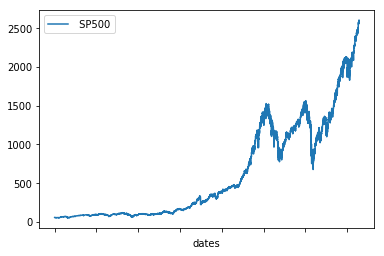

In [27]:
sp500 = pd.read_csv('data/sp500.csv')
sp500.set_index(keys='dates', inplace=True)
sp500.head()
sp500.plot(rot=90) # rotate the xticks by 90 degrees
sp500.shape

# Taking Log on the SP500 Price Series
- Due to compounding, we usually have to take **log** before analyzing the price series.
- The following plot suggests a linear relationship between the log price and trade day count.

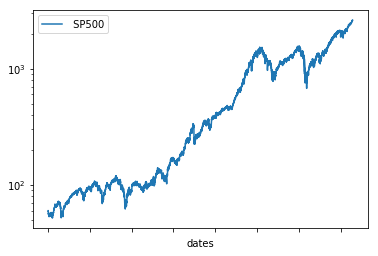

In [28]:
# Log-Scaled SP500 Price
sp500.plot(rot=90,logy=True)  # to take the logistic on the y values 

In [29]:
X = np.arange(sp500.shape[0]).reshape(-1,1)
ols.fit(X,np.log(sp500.values))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print(ols.intercept_)
print(ols.coef_)

[3.75538473]
[[0.00027783]]


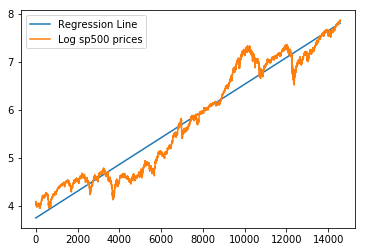

In [31]:
X1 = np.arange(sp500.shape[0])
Y1 = ols.intercept_ + ols.coef_[0] * X1
plt.plot(X1,Y1,label='Regression Line')
plt.plot(X1,np.log(sp500.values),label='Log sp500 prices')
plt.legend(loc=2)

# Analysis
- On Average the log SP500 stock price changes $0.00027783$ per trading day.
- Each year has about $252$ trading days, the price rises about $7\%$ each year. 
- This excludes the $2-4\%$ stock dividends returned to the investors each year.
- The total **long turn annual return** of **SP500** is about $10\%$ per year.

## Comparing the True Model with the Results from Linear Regression
- Consider a larger data set with $N=10000$. We can imagine that $N\mapsto \infty$ is the theorectical limit
- We random sub-sample (without repeatition) 1000 children data sets derived from the parent dataset through **random sampling**

In [32]:
from sklearn.linear_model import LinearRegression

N       = 10000
epsilon = 0.1 * np.random.randn(N)
X       = np.random.randn(N)
Y       = -3.0 + 2.0 * X+epsilon
ols     = LinearRegression()
Y.shape

(10000,)

In [33]:
from random import shuffle
indexes = np.arange(N)
from collections import defaultdict
intercepts = defaultdict(list)
coefs      = defaultdict(list)

n_samples = 20
for i in range(1000): 
        shuffle(indexes)
        subset = indexes[:n_samples]
        ols.fit(X[subset].reshape(-1,1),Y[subset])
        coefs[n_samples].append(ols.coef_[0])
        intercepts[n_samples].append(ols.intercept_)
        
n_samples = 1600
for i in range(1000): 
        shuffle(indexes)
        subset = indexes[:n_samples]
        ols.fit(X[subset].reshape(-1,1),Y[subset])
        coefs[n_samples].append(ols.coef_[0])
        intercepts[n_samples].append(ols.intercept_)        

- When n_samples increases, the range of the intercepts, coefficients scatterplot shrinks
- The center of the n_samples = 1600 scatter plot is biased, why?

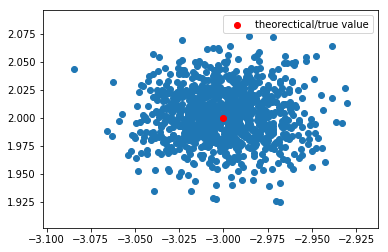

In [34]:
plt.scatter(intercepts[20], coefs[20])
plt.scatter([-3],[2],c='r', label='theorectical/true value')
plt.legend(loc=1)

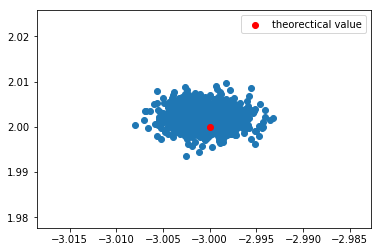

In [35]:
plt.scatter(intercepts[1600], coefs[1600])
plt.scatter([-3],[2],c='r', label='theorectical value')
plt.legend(loc=1)

The sample mean of the intercepts -3.000
The sample std of the intercepts 0.023


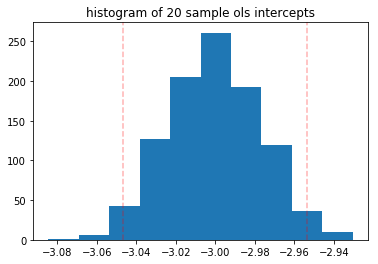

In [36]:
intercept_mean = np.mean(intercepts[20])
intercept_std  = np.std(intercepts[20])
print('The sample mean of the intercepts %.3f' %(intercept_mean))
print('The sample std of the intercepts %.3f' %(intercept_std))
ans = plt.hist(intercepts[20])
plt.title('histogram of %d sample ols intercepts' %(20))
plt.axvline(intercept_mean-2*intercept_std, c='r', alpha=0.3, linestyle='--')
plt.axvline(intercept_mean+2*intercept_std, c='r', alpha=0.3, linestyle='--')

The sample mean of the intercepts -3.000
The sample std of the intercepts 0.002


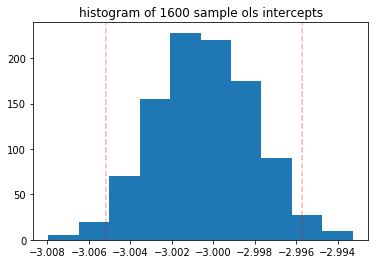

In [37]:
intercept_mean = np.mean(intercepts[1600])
intercept_std  = np.std(intercepts[1600])
print('The sample mean of the intercepts %.3f' %(intercept_mean))
print('The sample std of the intercepts %.3f' %(intercept_std))
ans = plt.hist(intercepts[1600])
plt.title('histogram of %d sample ols intercepts' %(1600))
plt.axvline(intercept_mean-2*intercept_std, c='r', alpha=0.3, linestyle='--')
plt.axvline(intercept_mean+2*intercept_std, c='r', alpha=0.3, linestyle='--')

The sample mean of the slopes 2.002
The sample std of the slopes 0.024


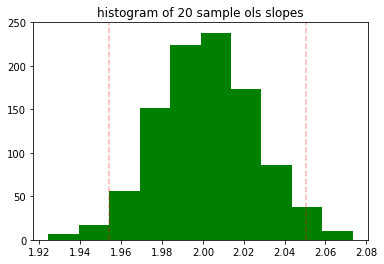

In [38]:
coef_mean = np.mean(coefs[20])
coef_std  = np.std(coefs[20])
print('The sample mean of the slopes %.3f' %(coef_mean))
print('The sample std of the slopes %.3f' %(coef_std))
ans = plt.hist(coefs[20], color='g')
plt.title('histogram of %d sample ols slopes' %(20))
plt.axvline(coef_mean-2*coef_std, c='r', alpha=0.3, linestyle='--')
plt.axvline(coef_mean+2*coef_std, c='r', alpha=0.3, linestyle='--')

The sample mean of the slopes 2.002
The sample std of the slopes 0.002


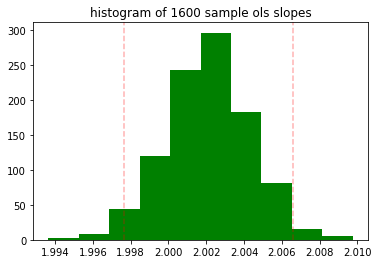

In [39]:
coef_mean = np.mean(coefs[1600])
coef_std  = np.std(coefs[1600])
print('The sample mean of the slopes %.3f' %(coef_mean))
print('The sample std of the slopes %.3f' %(coef_std))
ans = plt.hist(coefs[1600], color='g')
plt.title('histogram of %d sample ols slopes' %(1600))
plt.axvline(coef_mean-2*coef_std, c='r', alpha=0.3, linestyle='--')
plt.axvline(coef_mean+2*coef_std, c='r', alpha=0.3, linestyle='--')

## Theorectical Estimation of the Confidence Intervals
- Above analysis analyzes the likely location of the true model parameters through repeated numerical sampling
- scikit-learn offers no theorectical statistical estimation of the confidence intervals directly
- To see the result, we need to use an alternative package **statsmodels**
- The package is the python portal for R-style inferential statistical learning

In [40]:
import statsmodels.api as sm 

In [41]:
shuffle(indexes)
subset = indexes[:20]
X_add_const = sm.add_constant(X.reshape(-1,1))
ols = sm.OLS(Y[subset], X_add_const[subset,:])
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.875e+04
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.27e-28
Time:                        11:38:48   Log-Likelihood:                 25.516
No. Observations:                  20   AIC:                            -47.03
Df Residuals:                      18   BIC:                            -45.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0073      0.016   -186.578      0.0

- The t value is computed by coef/std(coef)
- By comparing the t value with the appropriate t-distribution, one may estimate the probability for 
the particular coefficient (slope or intercept) to be generated completely by chance
- This is known as t-statistics in the literature
- The p-value is used in the hypothesis-testing, to check whether the coefficient is actually zero (null hypothesis) or not